City Map Nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
City Map Edges: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'H'), ('G', 'H')]
Bi-directional BFS:
  Path: ['A', 'B', 'D', 'F', 'H']
  Time: 0.000000 seconds
BFS:
  Path: ['A', 'B', 'D', 'F', 'H']
  Time: 0.000000 seconds
DFS:
  Path: ['A', 'C', 'E', 'G', 'H']
  Time: 0.000000 seconds

Visualizing the shortest path using Bi-directional BFS...


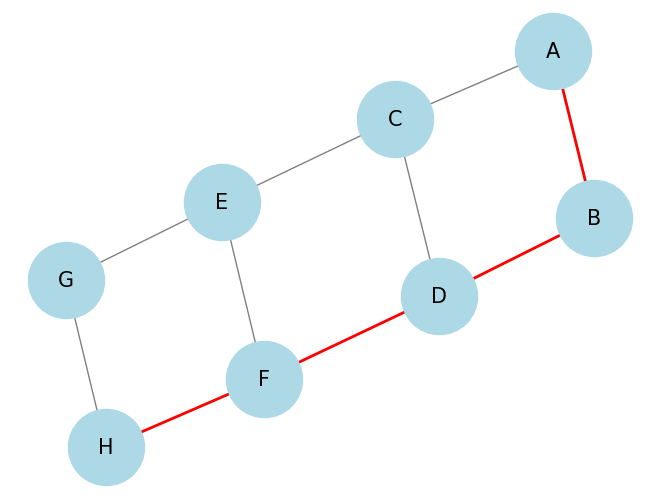

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

def create_city_map():
    """Create a sample city map as a graph."""
    city_map = nx.Graph()
    edges = [
        ('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'),
        ('C', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'),
        ('F', 'H'), ('G', 'H')
    ]
    city_map.add_edges_from(edges)
    return city_map

def bidirectional_bfs(graph, start, goal):
    """Find the shortest path using bi-directional BFS."""
    if start == goal:
        return [start]

    forward_queue = deque([start])
    backward_queue = deque([goal])

    forward_visited = {start: None}
    backward_visited = {goal: None}

    while forward_queue and backward_queue:
        # Forward search
        if forward_queue:
            current = forward_queue.popleft()
            for neighbor in graph.neighbors(current):
                if neighbor not in forward_visited:
                    forward_visited[neighbor] = current
                    forward_queue.append(neighbor)
                    if neighbor in backward_visited:
                        return reconstruct_path(forward_visited, backward_visited, neighbor)

        # Backward search
        if backward_queue:
            current = backward_queue.popleft()
            for neighbor in graph.neighbors(current):
                if neighbor not in backward_visited:
                    backward_visited[neighbor] = current
                    backward_queue.append(neighbor)
                    if neighbor in forward_visited:
                        return reconstruct_path(forward_visited, backward_visited, neighbor)

    return None

def reconstruct_path(forward_visited, backward_visited, meeting_point):
    """Reconstruct the path from start to goal."""
    path = []

    # Traverse forward path
    current = meeting_point
    while current is not None:
        path.append(current)
        current = forward_visited[current]

    path.reverse()

    # Traverse backward path
    current = backward_visited[meeting_point]
    while current is not None:
        path.append(current)
        current = backward_visited[current]

    return path

def bfs(graph, start, goal):
    """Find the shortest path using standard BFS."""
    queue = deque([start])
    visited = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            break

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)

    else:
        return None

    path = []
    while current is not None:
        path.append(current)
        current = visited[current]

    return path[::-1]

def dfs(graph, start, goal):
    """Find the path using DFS."""
    stack = [start]
    visited = {start: None}

    while stack:
        current = stack.pop()
        if current == goal:
            break

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                stack.append(neighbor)

    else:
        return None

    path = []
    while current is not None:
        path.append(current)
        current = visited[current]

    return path[::-1]

def compare_algorithms(graph, start, goal):
    """Compare bi-directional BFS with standard BFS and DFS."""
    algorithms = {
        'Bi-directional BFS': bidirectional_bfs,
        'BFS': bfs,
        'DFS': dfs
    }

    results = {}

    for name, algorithm in algorithms.items():
        start_time = time.time()
        path = algorithm(graph, start, goal)
        end_time = time.time()
        results[name] = {
            'path': path,
            'time': end_time - start_time
        }

    return results

def visualize_graph(graph, path=None):
    """Visualize the graph and the path with edge weights."""
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=15)

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()


# Main Execution
if __name__ == "__main__":
    city_map = create_city_map()
    start_node = 'A'
    goal_node = 'H'

    print("City Map Nodes:", city_map.nodes)
    print("City Map Edges:", city_map.edges)

    results = compare_algorithms(city_map, start_node, goal_node)

    for algorithm, result in results.items():
        print(f"{algorithm}:\n  Path: {result['path']}\n  Time: {result['time']:.6f} seconds")

    print("\nVisualizing the shortest path using Bi-directional BFS...")
    visualize_graph(city_map, results['Bi-directional BFS']['path'])


City Map Nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
City Map Edges: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'H'), ('G', 'H')]
Bi-directional Dijkstra:
  Path: ['A', 'C', 'E', 'G', 'H']
  Time: 0.000000 seconds
Dijkstra:
  Path: ['A', 'C', 'D', 'F', 'H']
  Time: 0.000000 seconds
DFS:
  Path: ['A', 'C', 'E', 'G', 'H']
  Time: 0.000000 seconds

Visualizing the shortest path using Bi-directional Dijkstra...


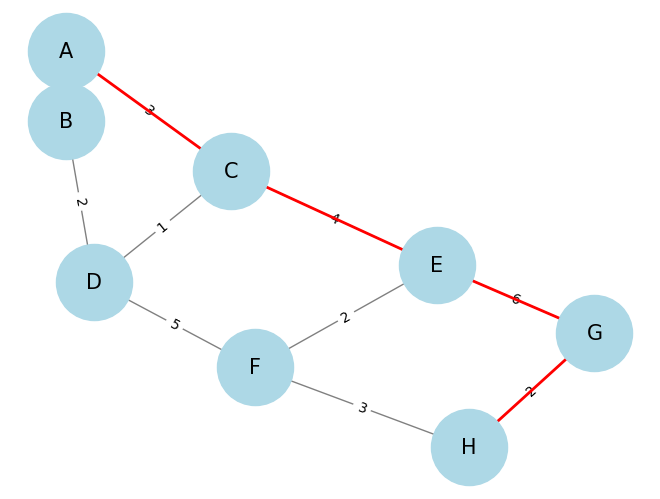

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time
import heapq

def create_weighted_city_map():
    """Create a sample weighted city map as a graph."""
    city_map = nx.Graph()
    edges = [
        ('A', 'B', 4), ('A', 'C', 3), ('B', 'D', 2), ('C', 'D', 1),
        ('C', 'E', 4), ('D', 'F', 5), ('E', 'F', 2), ('E', 'G', 6),
        ('F', 'H', 3), ('G', 'H', 2)
    ]
    for u, v, weight in edges:
        city_map.add_edge(u, v, weight=weight)
    return city_map

def bidirectional_dijkstra(graph, start, goal):
    """Find the shortest path using bi-directional Dijkstra's algorithm."""
    if start == goal:
        return [start]

    # Priority queues for forward and backward searches
    forward_queue = [(0, start)]  # (cost, node)
    backward_queue = [(0, goal)]

    forward_visited = {start: (None, 0)}  # node: (previous_node, cost)
    backward_visited = {goal: (None, 0)}

    while forward_queue and backward_queue:
        # Forward search
        if forward_queue:
            current_cost, current_node = heapq.heappop(forward_queue)
            for neighbor in graph.neighbors(current_node):
                edge_weight = graph[current_node][neighbor]['weight']
                new_cost = current_cost + edge_weight
                if neighbor not in forward_visited or new_cost < forward_visited[neighbor][1]:
                    forward_visited[neighbor] = (current_node, new_cost)
                    heapq.heappush(forward_queue, (new_cost, neighbor))
                    if neighbor in backward_visited:
                        return reconstruct_path(forward_visited, backward_visited, neighbor)

        # Backward search
        if backward_queue:
            current_cost, current_node = heapq.heappop(backward_queue)
            for neighbor in graph.neighbors(current_node):
                edge_weight = graph[current_node][neighbor]['weight']
                new_cost = current_cost + edge_weight
                if neighbor not in backward_visited or new_cost < backward_visited[neighbor][1]:
                    backward_visited[neighbor] = (current_node, new_cost)
                    heapq.heappush(backward_queue, (new_cost, neighbor))
                    if neighbor in forward_visited:
                        return reconstruct_path(forward_visited, backward_visited, neighbor)

    return None

def reconstruct_path(forward_visited, backward_visited, meeting_point):
    """Reconstruct the path from start to goal."""
    path = []

    # Traverse forward path
    current = meeting_point
    while current is not None:
        path.append(current)
        current = forward_visited[current][0]

    path.reverse()

    # Traverse backward path
    current = backward_visited[meeting_point][0]
    while current is not None:
        path.append(current)
        current = backward_visited[current][0]

    return path

def dijkstra(graph, start, goal):
    """Find the shortest path using Dijkstra's algorithm."""
    queue = [(0, start)]  # (cost, node)
    visited = {start: (None, 0)}  # node: (previous_node, cost)

    while queue:
        current_cost, current_node = heapq.heappop(queue)
        if current_node == goal:
            break

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor]['weight']
            new_cost = current_cost + edge_weight
            if neighbor not in visited or new_cost < visited[neighbor][1]:
                visited[neighbor] = (current_node, new_cost)
                heapq.heappush(queue, (new_cost, neighbor))

    else:
        return None

    path = []
    while current_node is not None:
        path.append(current_node)
        current_node = visited[current_node][0]

    return path[::-1]

def dfs(graph, start, goal):
    """Find the path using DFS (ignoring edge weights)."""
    stack = [start]
    visited = {start: None}

    while stack:
        current = stack.pop()
        if current == goal:
            break

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                stack.append(neighbor)

    else:
        return None

    path = []
    while current is not None:
        path.append(current)
        current = visited[current]

    return path[::-1]

def compare_algorithms(graph, start, goal):
    """Compare bi-directional Dijkstra's with Dijkstra and DFS."""
    algorithms = {
        'Bi-directional Dijkstra': bidirectional_dijkstra,
        'Dijkstra': dijkstra,
        'DFS': dfs
    }

    results = {}

    for name, algorithm in algorithms.items():
        start_time = time.time()
        path = algorithm(graph, start, goal)
        end_time = time.time()
        results[name] = {
            'path': path,
            'time': end_time - start_time
        }

    return results

def visualize_graph(graph, path=None):
    """Visualize the graph and the path with edge weights."""
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=15)

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()

  # Main Execution
if __name__ == "__main__":
    city_map = create_weighted_city_map()
    start_node = 'A'
    goal_node = 'H'

    print("City Map Nodes:", city_map.nodes)
    print("City Map Edges:", city_map.edges)

    results = compare_algorithms(city_map, start_node, goal_node)

    for algorithm, result in results.items():
        print(f"{algorithm}:\n  Path: {result['path']}\n  Time: {result['time']:.6f} seconds")

    print("\nVisualizing the shortest path using Bi-directional Dijkstra...")
    visualize_graph(city_map, results['Bi-directional Dijkstra']['path'])
